# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import for readability of data coming back from the API retrieval
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (.csv)
output_data_file = "output_data/../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
 
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the static url information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

temperature_unit = "Imperial"

# Initialize the lists for use in holding associated data.
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Initialize an integer to count the records
record_counter = 1

print(f"Beginning Data Retrieval")

# Loop through the cities and pull the requested  weather information from the openweathermap

for city in cities:
   
    query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + temperature_unit
    response = requests.get(query_url).json()

    try:
      
      # Print out the city being worked with 
      print(f"Processing Record {record_counter} of Set 1 | {city}")  
            
      cloudiness.append(response["clouds"]["all"])
      country.append(response["sys"]["country"])
      date.append(response["dt"])
      max_temp.append(response["main"]["temp_max"])
      humidity.append(response["main"]["humidity"])
      lat.append(response["coord"]["lat"])
      lng.append(response["coord"]["lon"])
      wind_speed.append(response["wind"]["speed"])
      city_name.append(response["name"])
        
      # Increment the record counter     
      record_counter += 1
            
    except:    
      print(f"   Unable to locate City:  {city}")
      record_counter += 1
            
print(f"-----------------------------")
print(f" Data Retrieval Complete")  
print(f"-----------------------------")            

Beginning Data Retrieval
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | odienne
Processing Record 7 of Set 1 | prince rupert
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | padang
Processing Record 11 of Set 1 | mezen
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | leh
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | yingcheng
Processing Record 17 of Set 1 | praia da vitoria
Processing Record 18 of Set 1 | saint anthony
Processing Record 19 of Set 1 | taolanaro
   Unable to locate City:  taolanaro
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | cayenne
Processing Record 23 of Set 1 | moun

Processing Record 185 of Set 1 | tautira
Processing Record 186 of Set 1 | coquimbo
Processing Record 187 of Set 1 | east london
Processing Record 188 of Set 1 | souillac
Processing Record 189 of Set 1 | tommot
Processing Record 190 of Set 1 | ntchisi
Processing Record 191 of Set 1 | cabo san lucas
Processing Record 192 of Set 1 | kodiak
Processing Record 193 of Set 1 | caconda
Processing Record 194 of Set 1 | tangermunde
Processing Record 195 of Set 1 | pyshchug
Processing Record 196 of Set 1 | belushya guba
   Unable to locate City:  belushya guba
Processing Record 197 of Set 1 | vallenar
Processing Record 198 of Set 1 | husavik
Processing Record 199 of Set 1 | qaqortoq
Processing Record 200 of Set 1 | cherskiy
Processing Record 201 of Set 1 | hihifo
   Unable to locate City:  hihifo
Processing Record 202 of Set 1 | nanortalik
Processing Record 203 of Set 1 | slave lake
Processing Record 204 of Set 1 | maarianhamina
Processing Record 205 of Set 1 | jumla
Processing Record 206 of Set 1

Processing Record 361 of Set 1 | poso
Processing Record 362 of Set 1 | pochutla
Processing Record 363 of Set 1 | tocopilla
Processing Record 364 of Set 1 | krasnouralsk
Processing Record 365 of Set 1 | aldan
Processing Record 366 of Set 1 | acapulco
Processing Record 367 of Set 1 | shimoda
Processing Record 368 of Set 1 | miraflores
Processing Record 369 of Set 1 | jipijapa
Processing Record 370 of Set 1 | lichuan
Processing Record 371 of Set 1 | kaithal
Processing Record 372 of Set 1 | sumbawa
   Unable to locate City:  sumbawa
Processing Record 373 of Set 1 | buarcos
Processing Record 374 of Set 1 | ust-nera
Processing Record 375 of Set 1 | conway
Processing Record 376 of Set 1 | cap malheureux
Processing Record 377 of Set 1 | zaozerne
Processing Record 378 of Set 1 | karakol
Processing Record 379 of Set 1 | garden city
Processing Record 380 of Set 1 | mudgee
Processing Record 381 of Set 1 | te anau
Processing Record 382 of Set 1 | taoudenni
Processing Record 383 of Set 1 | talara
Pr

Processing Record 544 of Set 1 | tahoua
Processing Record 545 of Set 1 | mbala
Processing Record 546 of Set 1 | guymon
Processing Record 547 of Set 1 | santa ines
Processing Record 548 of Set 1 | ishim
Processing Record 549 of Set 1 | kramat
Processing Record 550 of Set 1 | jalu
Processing Record 551 of Set 1 | luderitz
Processing Record 552 of Set 1 | pizarro
Processing Record 553 of Set 1 | kirakira
Processing Record 554 of Set 1 | codrington
Processing Record 555 of Set 1 | koungou
Processing Record 556 of Set 1 | gujranwala
Processing Record 557 of Set 1 | miahuatlan
Processing Record 558 of Set 1 | mlowo
Processing Record 559 of Set 1 | nehe
Processing Record 560 of Set 1 | talnakh
Processing Record 561 of Set 1 | nabire
Processing Record 562 of Set 1 | ishigaki
Processing Record 563 of Set 1 | mareeba
Processing Record 564 of Set 1 | san cristobal
Processing Record 565 of Set 1 | okato
Processing Record 566 of Set 1 | iqaluit
Processing Record 567 of Set 1 | aksarka
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe to prepare the order the data will be written to the output file cities.csv
api_city_weather_df = pd.DataFrame({"City": city_name,
                                    "Lat": lat,
                                    "Lng": lng,
                                    "Max Temp": max_temp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed": wind_speed,
                                    "Country": country,
                                    "Date": date
             })  


In [5]:
# Export the City weather data into a .csv file

api_city_weather_df.to_csv("../Resources/cities.csv",
                  encoding="utf-8", index=False, header=True)

In [6]:
# Print the dataframe which represents the data written to the cities.csv file
api_city_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,73.99,44,28,17.00,NZ,1615695560
1,Ilulissat,69.2167,-51.1000,8.60,56,100,13.80,GL,1615695763
2,Albany,42.6001,-73.9662,33.01,50,1,5.14,US,1615695800
3,Aklavik,68.2191,-135.0107,-13.00,77,24,6.91,CA,1615695800
4,Punta Arenas,-53.1500,-70.9167,44.01,65,0,3.44,CL,1615695801


In [7]:
api_city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.224384,14.321768,54.328345,72.262590,54.379496,8.056619,1.615696e+09
std,33.468734,90.028051,26.974390,20.986553,39.288651,5.594034,1.097745e+02
min,-54.800000,-179.166700,-22.670000,9.000000,0.000000,0.070000,1.615696e+09
25%,-7.988250,-66.998500,35.600000,62.000000,15.000000,3.440000,1.615696e+09
50%,22.622500,21.129150,62.625000,77.000000,65.000000,6.910000,1.615696e+09
75%,49.650450,88.852925,75.512500,88.000000,93.000000,11.500000,1.615696e+09
max,78.218600,179.316700,97.000000,100.000000,100.000000,31.070000,1.615696e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.

#      At this time, there does not appear to be any cities having humidity > 100%
#      As per the instructions, skipping this step

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#     At this time, there does not appear to be any cities having humidity > 100%
#     As per the instructions, skipping this step


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

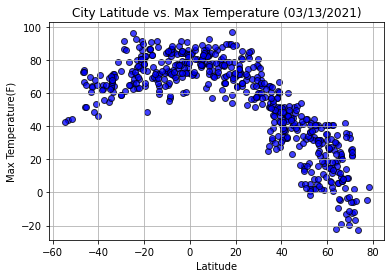

In [10]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Max Temp"], 
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.grid()
plt.title("City Latitude vs. Max Temperature (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.savefig("Images/TemperatureVsLatitude.png")
plt.show()

* Taking a look at the relationship of random cities based on the comparison between each city's highest temperature 
  and where each is located. This scatter plot is showing a possible temperature relationship based on its distance 
  from the highest point in the northern hemisphere. (north pole) Further analysis needed.
 

## Latitude vs. Humidity Plot

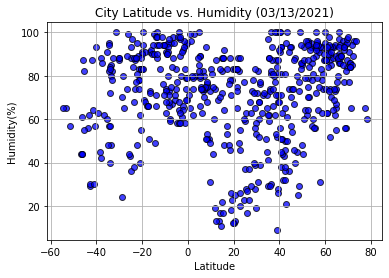

In [11]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Humidity"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Humidity (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.savefig("Images/HumidityVsLatitude.png")
plt.show()

* Taking a look at the relationship of random cities based on the comparison between each city's humidity level 
  and where each is located. This scatter plot is showing that there "might" be some sort of a connection between each
  city's location and amount of humidity in it's location. Further analysis needed.

## Latitude vs. Cloudiness Plot

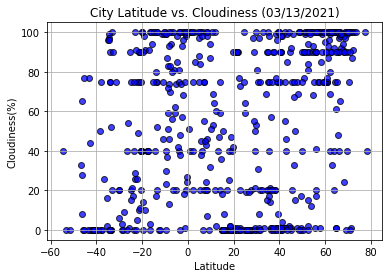

In [12]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Cloudiness"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Cloudiness (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.savefig("Images/CloudinessVsLatitude.png")
plt.show()

* Taking a look at the relationship of random cities based on the comparison between each city's 
  level of cloudiness and where each is located. This scatter plot is showing that there might or might not be
  a relationship between the mount of cloudiness and each city's location. There does appear to be a common 
  amount of cloudinesss, at different levels, horizontally across the globe. Further analysis needed.

## Latitude vs. Wind Speed Plot

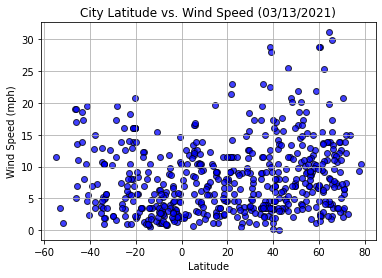

In [13]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Wind Speed"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Wind Speed (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Images/WindSpeedVsLatitude.png")
plt.show()

* Taking a look at the relationship of random cities based on the comparison between each city's
  wind speeds and where each city is located. This scatter plot is showing that there is a possibility that
  there may be some sort of a conection between each city's location (in the southern hemisphere) and 
  location. Further analysis needed.

## Linear Regression

In [14]:
# Northern Hemisphere is where Latitude ranges from 0 through +90  
northernhemisphere = api_city_weather_df.loc[(api_city_weather_df["Lat"] >= 0) & (api_city_weather_df["Lat"] <= 90), :]

# Southern Hemisphere is where Latitude ranges from 0 through -90 
southernhemisphere = api_city_weather_df.loc[(api_city_weather_df["Lat"] >= -90) & (api_city_weather_df["Lat"] < 0), :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.8913495211069545


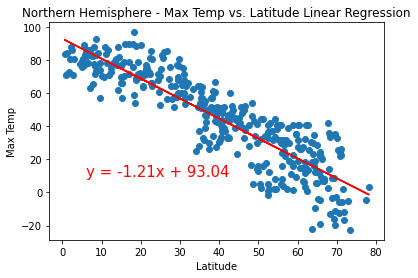

In [15]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("Images/NorthernHemisphere-TemperatureVsLatitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.5159706294273984


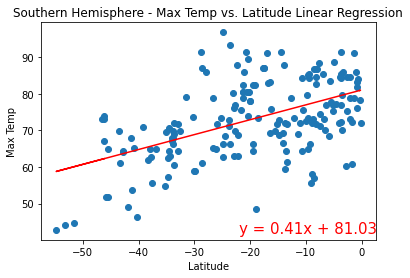

In [16]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-22,42), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("Images/SouthernHemisphere-TemperatureVsLatitude.png")
plt.show()

* The Northern Hemisphere plot shows that there is a strong negative correlation between the temperature
  decreasing as a city's location is situated further away from the north pole.
  The Southern Hemisphere plot show that there is a moderate positive correlation between the temperature
  increasing as a city's location gets closer to the north pole.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.31315031089239664


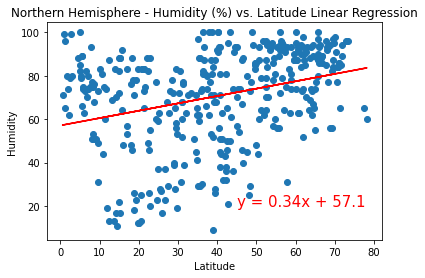

In [17]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(45,20), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("Images/NorthernHemisphere-HumidityVsLatitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.3352278412443532


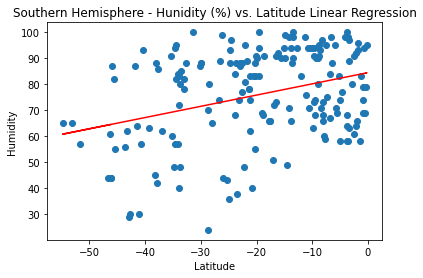

In [18]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,20), fontsize=15, color="red")
plt.title("Southern Hemisphere - Hunidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("Images/SouthernHemisphere-HumidityVsLatitude.png")

* Both the Northern Hemisphere and Southern Hemisphere have weak positive correlations between the humidity and
  each random city's location.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.3167855183763657


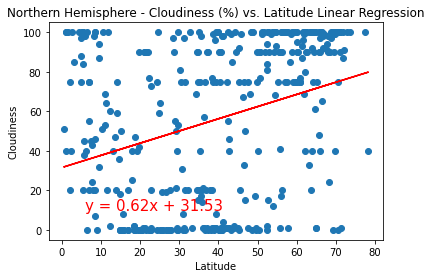

In [19]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("Images/NorthernHemisphere-CloudinessVsLatitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.40173797667692246
y = 1.1x + 73.04


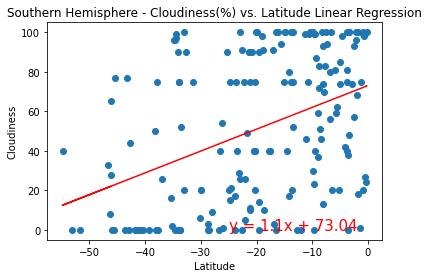

In [20]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,0), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("Images/SouthernHemisphere-CloudinessVsLatitude.png")

* Both the Northern and Southern Hemispheres have weak positive correlations between the cloudiness
  and each random city's location. 
  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.14651886020172578


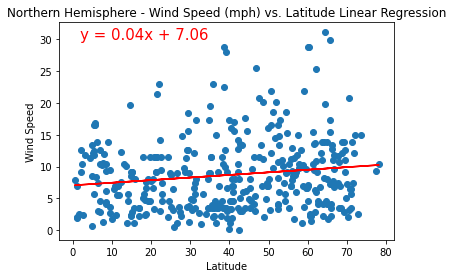

In [21]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(2,30), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("Images/NorthernHemisphere-WindVsLatitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.3559697278707921


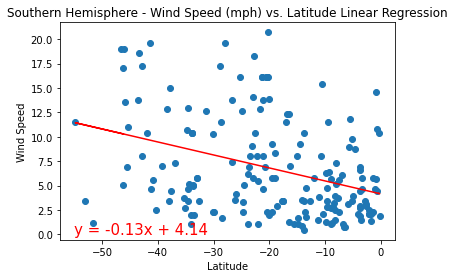

In [22]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,0), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("Images/SouthernHemisphere-WindVsLatitude.png")

* The Northern Hemisphere shows that there is a very weak or no positive 
  correlation between a city's location and wind speed. Interestly enough, 
  the Southern Hemisphere shows that there is a moderate negative correlation 
  between a city's location and the wind speed.
